Please input your text data (or paste from a file). To end, press Enter twice:

You've entered the following text:

An interesting device for regulating and reversing has been devised by Mr. Tesla for the purpose of varying the speed of polyphase motors. It consists of a form of converter or transformer with one element capable of movement with respect to the other, whereby the inductive relations may be altered, either manually or automatically, for the purpose of varying the strength of the induced current. Mr. Tesla prefers to construct this device in such manner that the induced or secondary element may be movable with respect to the other; and the invention, so far as relates merely to the construction of the device itself, consists, essentially, in the combination, with two opposite magnetic poles, of an armature wound with an insulated coil and mounted on a shaft, whereby it may be turned to the desired extent within the field produced by the poles. The normal position of the co

Nikola Tesla is device for regulating and reversing has been devised by mr tesla for the purpose of varying the speed of polyphase motors it consists of a form of converter or transformer with one element capable of movement with respect to the


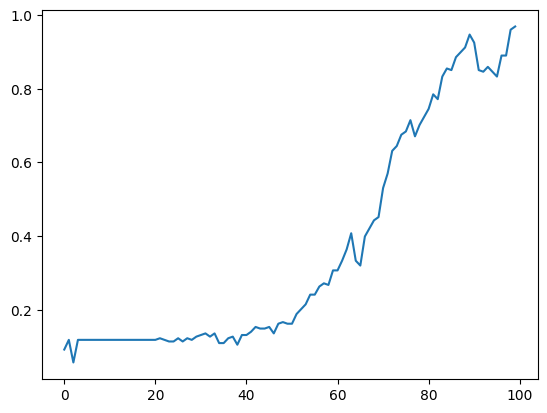

In [3]:
# Libraries to be used
import tensorflow as tf
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r',', '', text)
    text = re.sub(r'\'', '',  text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'\(', '', text)
    text = re.sub(r'\)', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'“', '', text)
    text = re.sub(r'”', '', text)
    text = re.sub(r'’', '', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r';', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'\-', '', text)

    return text

# Take custom inputs, Note: For output use prompt according to result want
print("Please input your text data (or paste from a file). To end, press Enter twice:")
story_data = ""
while True:
    line = input()
    if line == "":
        break
    story_data += line + "\n"

print("\nYou've entered the following text:\n")
print(story_data)

# Data cleaning starts here
lower_data = story_data.lower()
split_data = lower_data.splitlines()

final = ''  # Initiating an argument with a blank string to hold the final cleaned data
for line in split_data:
    line = clean_text(line)
    final += '\n' + line

final_data = final.split('\n')
print(final_data)

# Tokenization of the cleanedout
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Fetching out total words you inputted in the above
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1
print(vocab_size)

# Using n-gram sequences from the sentences
input_seq = []
for line in final_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_seq.append(n_gram_seq)

print(input_seq)

# Maxout Length for padding
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

# Taking xs and labels to train the model
xs = input_seq[:, :-1]
labels = input_seq[:, -1]
print("xs: ", xs)
print("labels: ", labels)

# One-hot encoding the labels according to the vocab size
ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

# Building the model using functional API
i = Input(shape=(max_seq_length - 1, ))
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i, x)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training Starts here
r = model.fit(xs, ys, epochs=100)

# Model accuracy prediction plotting (Evaluation process)
plt.plot(r.history['accuracy'])

# Function for printing out relavent output for a given prompt
def predict_words(seed, no_words):
    for i in range(no_words):
        token_list = tokenizer.texts_to_sequences([seed])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=1)

        new_word = ''
        for word, index in tokenizer.word_index.items():
            if predicted == index:
                new_word = word
                break
        seed += " " + new_word
    print(seed)

# Predicting or generating the text with the seed text
seed_text = input("\nEnter the seed text for generating Text: ")
next_words = int(input("Enter the number of words to generate: "))
predict_words(seed_text, next_words)

# saving the model

model.save('text_generator.h5')

